[View in Colaboratory](https://colab.research.google.com/github/lrdshiva/MNIST_using_perceptron/blob/master/perceptron_on_MNIST.ipynb)

In [1]:
!pip install -U -q PyDrive
!pip install sklearn

  Running setup.py bdist_wheel for sklearn ... - done
  Stored in directory: /root/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [0]:
# the following code enables us to transfer data directly from our google drive account.
# visit https://pythonhosted.org/PyDrive/ for details
from google.colab import files

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# imports from drive account and be sure to get the id of the shareable link 
# i downloaded the dataset in csv format from the following link and uploaded in drive
# https://pjreddie.com/projects/mnist-in-csv/

train_df = drive.CreateFile({'id':'1L6yemQMJWFM3wvsPPlk5GQMu-LxmhI2O'}) 

test_df = drive.CreateFile({'id':'1oAki5WrvXajt0iaBHshx1ShKRTixgD7y'})

In [0]:
#data dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score


train_df.GetContentFile('mnist_train.csv')
test_df.GetContentFile('mnist_test.csv')

In [0]:
train = np.genfromtxt('mnist_train.csv', delimiter = ',')
test = np.genfromtxt('mnist_test.csv', delimiter = ',')

# extract the X part and y part of data set
# as the first col is label data

train_X = train[:,1:] 
test_X = test[:,1:]

train_y=train[:,0]
test_y=test[:,0]

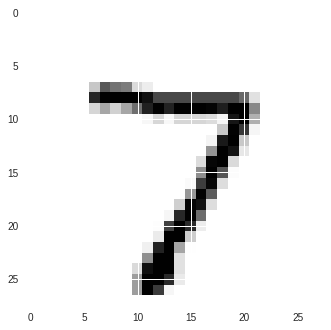

In [6]:
# convert it to 28X28 format to represent it in image
img_set = np.zeros((test.shape[0],28,28))
img_set= test_X.reshape((-1,28,28))
plt.imshow(img_set[0,:,:])

In [7]:
print( "the shape of training mnist data set is ",train.shape," and size of test set",test.shape)

the shape of training mnist data set is  (60000, 785)  and size of test set (10000, 785)


In [9]:
#find the number of unique labels in the training set
#according to the info given the labels are in col 1
unique_y = np.unique(train_y,axis=0)
print("unique elements= ", unique_y," and total = ", unique_y.shape)

unique elements=  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]  and total =  (10,)


In [10]:
ppn = Perceptron(n_iter =2, eta0 =0.1, random_state = 0)

ppn.fit(train_X,train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=2, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [0]:
pred_y = ppn.predict(test_X)

In [12]:
print('Accuracy: %.2f' % accuracy_score(test_y, pred_y))

Accuracy: 0.89


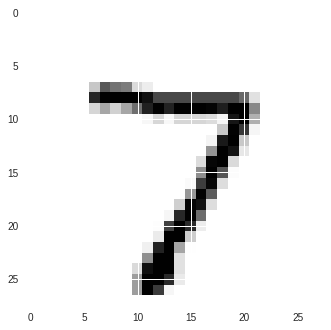

In [14]:
plt.imshow(img_set[0,:,:])

In [15]:
print("predicted numbers  ",pred_y[0:10])

predicted numbers   [7. 2. 1. 0. 4. 1. 4. 9. 6. 9.]


In [16]:
print("test labels ",test_y[0:10])

test labels  [7. 2. 1. 0. 4. 1. 4. 9. 5. 9.]
